<DIV ALIGN=CENTER>

# Support Vector Machine
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we explore how to effectively use the Support
Vector Machine (SVM). First, we repeat the analysis of the Iris and
hand-written digit data used in the [K-NN][l1] IPython Notebook.
However, we now switch to the SVM algorithm. Throughout this Notebook,
you should think about how these results from this algorithm are
different than the results from the KNN algorithm. Also, explore how
changes in the default parameters might affect the performance of this
algorithm, such as using different kernels, or the `gamma` and `C`
parameters.

First, we will setup this Notebook, and then introduce the Iris data,
before making classifications for this data by using the scikit learn's
[Support Vector Machine][svmsk] algorithm.

-----
[l1]: intro2knn.ipynb
[svmsk]: http://scikit-learn.org/stable/modules/svm.html

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


-----

## Iris Data

We will use the standard Iris classification data set to explore how to
use these basic classification algorithms, starting in this Notebooks
with k-nearest neighbors, or knn. The four primary dimensions of the
data include Sepal Length, Sepal Width, Petal Length, and Petal Width,
which can be seen from the following Iris picture (or type _virginica_).

![Iris picture from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

The data set consists of 150 total measurements of three different types
of Iris flowers, equally divided between three classes: Iris Setosa,
Iris versicolor, and Iris virginica. Before proceeding, we can examine
the Pandas DataFrame that contains these data.

-----

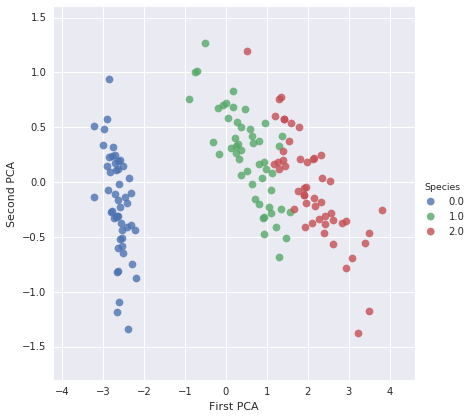

In [2]:
from helper_code import iris as hi

import pandas as pd

data = hi.get_data()
mdata = hi.get_mdata(data)

x = data[:, 0:2]
y = data[:, 2]

# SHow the data
cols = ['PCA1', 'PCA2', 'Species']

hi.scplot_data('PCA1', 'PCA2', pd.DataFrame(data, columns = cols), 'Species',
               'First PCA', 'Second PCA', (-4.2, 4.6), (-1.8, 1.6), 6)

-----

## [Support Vector Machine][svm] (SVM)

The next algorithm we will demonstrate is a powerful, but simple
approach to algorithmically divide data into distinct classes.  Support
Vector Machine, or Support Vector Classification (SVC) in this case,
determine optimal hyperplanes that optimally divide the training data.
Generally we use linear hyperplanes, which results in linear SVC. This
is demonstrated in the following figure from Wikipedia, where H3 does
not divide the data into the correct two classes, H1 does divide the two
but not optimally, while H2 optimally divides the data into the two
classes.

![SVM Image from Wikipedia][svmi]

We perform linear SVC in scikit-learn by specifying a `linear` kernel
parameter when creating the classifier. Once we fit the model to the
data, we can once again use the trained model to make predictions, which
we can test by using the evaluation score and confusion matrix.

-----

[svm]: https://en.wikipedia.org/wiki/Support_vector_machine
[svmi]: https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/503px-Svm_separating_hyperplanes.png

SVM prediction accuracy =  94.7%


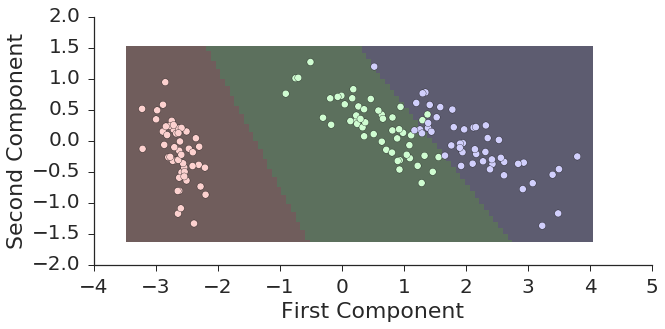

In [3]:
import sklearn.cross_validation as cv
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

# Next lets try Linear SVM
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1)
svc.fit(x_train, y_train)

z = svc.predict(mdata)

hi.splot_data(data, mdata, z, 'First Component', 'Second Component', 50)

print("SVM prediction accuracy = {0:5.1f}%".format(100.0 * svc.score(x_test, y_test)))

In [4]:
from sklearn.metrics import classification_report

y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        15
 Versicolor       0.91      0.91      0.91        11
  Virginica       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38



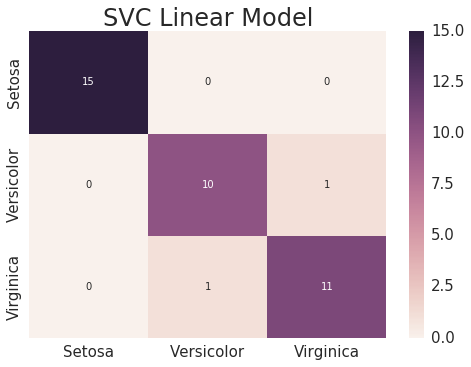

In [5]:
from helper_code import mlplots as mlp

mlp.confusion(y_test, y_pred, ['Setosa', 'Versicolor', 'Virginica'], 3, 'SVC Linear Model')

-----

## Student Activity

In the preceding cells, we used a simple SVM model to
predict classifications for the Iris Data. Now that you have run the
Notebook once, go back and make the following changes to see how the
results change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?
2. Change the default parameters in the SVM algorithm.
Read the code documentation to learn about the default parameters.
3. Change the kernel from _linear_ to _poly_ or _rbf_.

How does the two-dimensional figure compare to the same figure in the KNN Notebook?

-----

## Handwritten Digits

Now we switch to a second type of data and explore SVM
classification applied to handwritten digits. First we will load the
data and review some of the sample. After which, we will apply a
SVM classification to these data and explore the
resulting predictions.

-----

Total number of samples = 1797


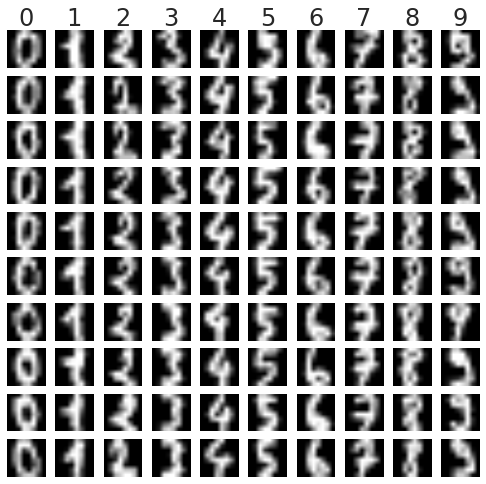

In [6]:
# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

-----

### Classification of image data

Now that these data are loaded, we can apply an SVM classifier to this
problem. Below we employ a linear Support Vector Classification
Multinomial model, and show the classification score, the classification
report, and the confusion matrix.

-----

In [7]:
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

svc = svm.SVC(kernel='linear', gamma=0.001, C=100)

svc.fit(x_train, y_train)

print('Prediction Accuracy = {0:3.1f}%'.format(100*svc.score(x_test, y_test)))

Prediction Accuracy = 96.7%


In [8]:
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        51
          1       0.90      1.00      0.95        43
          2       1.00      0.98      0.99        43
          3       0.96      0.96      0.96        46
          4       0.98      1.00      0.99        41
          5       0.94      0.98      0.96        47
          6       1.00      0.98      0.99        44
          7       0.98      1.00      0.99        51
          8       0.97      0.81      0.88        36
          9       0.96      0.94      0.95        48

avg / total       0.97      0.97      0.97       450



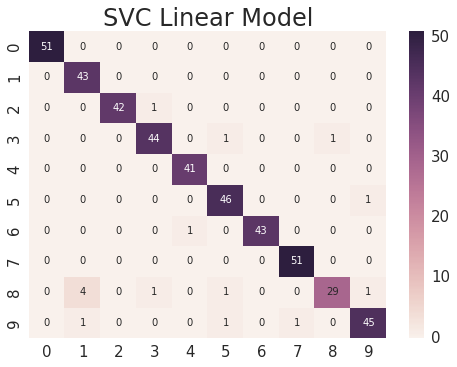

In [9]:
nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

mlp.confusion(y_test, y_pred, nms, 10, 'SVC Linear Model')

-----

### Model Evaluation

The Linear SVM model performed in a reasonable manner, but what about
on completely blind data. We can test the model by _making_ new data.
Below we use methods in the helper code to make _fake_ data, in this
case images of **one** and **seven**. We display the _fake_ images, and
then the results of our model classifying these new data.

-----

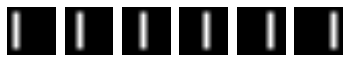

In [10]:
# Test on our sevens

ones = hd.make_ones()

hd.plot_numbers(ones)

In [11]:
# You can change the values to make other numbers.

ones[0].reshape(8,8)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [12]:
print('Actual : Predicted')

for one in ones:
    print('  1    :     {0}'.format(svc.predict(one.ravel())[0])) 

Actual : Predicted
  1    :     4
  1    :     4
  1    :     4
  1    :     4
  1    :     0
  1    :     4


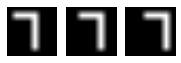

In [13]:
# Now test on our sevens

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [14]:
print('Actual : Predicted')
for seven in sevens:
    print('  7    :     {0}'.format(svc.predict(seven.ravel())[0])) 

Actual : Predicted
  7    :     3
  7    :     0
  7    :     7


-----

## Student Activity

In the preceding cells, we used a simple Linear SVM model to predict
classifications for the digit data. Now that you have run the Notebook,
go back and make the following changes to see how the results change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?
2. Change the default parameters in the Linear SVM algorithm, for
example `gamma` and `C`. Read the code documentation to learn about the
default parameters.
3. Change the kernel in the SVM algorithm to either a `poly` or `rbf`.
Gaussian.

Finally can you explain (feel free to use the class forums) why the
model performed in the  manner it did for the _fake_ digits? How did
this compare to the KNN model?

-----